In [13]:
# Load packages required for this example
library(scoper)
library(dplyr)
library(ggplot2)
library(alakazam)
library(shazam)

# loading my tsv as a df
# this tsv contains only H
require(data.table)
vac_H_data <- as.data.frame(fread("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv"))

# In order to infer clonal relationship, the simplest method is
# defining clones among identical junction region sequences.
# this is the junciton where the V, D, and J gene segments join.

In [14]:
read.table("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv", sep = '\t', header = TRUE)

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa,germline_alignment_d_mask,germline_v_call,germline_d_call,germline_j_call
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACGATACTCAACGCTA-1_contig_2,ACTGTTCTCTTTACAGTTACTGAGCACACAGGACCTCACCATGGGATGGAGCTGTATCATGCTCTTCTTGGCAGCAACAGCTACAGGTGTCCACTCCCAGGTCCAACTGCAGCAGCCTGGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTCACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAATAGTGGTGGTACTAAGTACAATGAGAAGTTCAAGAGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA,FALSE,TRUE,IGHV1-72*01,IGHD1-1*01,IGHJ4*01,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGANNNNNNNNCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG,⋯,6,IGHV1-72,,IGHJ4,TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG,CARLGGYGNAMDYW,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGANNNNNNNNNNNNNNNNATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,IGHV1-72*01,IGHD1-1*01,IGHJ4*01
TGGCCAGTCTCTTATG-1_contig_1,GAACAACCCATGATCAGTATCCTCTCCACAGTCACTGAAGACACTGACTCAAACCATGGAATGGTGCTGGGTCTTTCTCTTCCTCCTGTCAGTAACTGCAGGTGTCCACTCCCAGGTCCAGCTGCAGCAGTCTGGAGCTGAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTCACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGAAGTGGTAGTATAAAGTACAATGAGAAATTCAAGGACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA,FALSE,TRUE,"IGHV1-62-2*01,IGHV1-71*01",,IGHJ4*01,CAGGTCCAGCTGCAGCAGTCTGGAGCT...GAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGA......AGTGGTAGTATAAAGTACAATGAGAAATTCAAG...GACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,CAGGTCCAGCTGCAGCAGTCTGGAGCT...GAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGA......AGTGGTAGTATAAAGTACAATGAGAAATTCAAG...GACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGANNNNTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,TGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGG,⋯,9,IGHV1-71,

In [5]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': object 'results' not found


In [ ]:
# Plot a histogram of inter clonal distances
plot(results, binwidth)

In [ ]:
# Get summary data.frame
glimpse(summary(results))

In [ ]:
# Method 1. 
# Clonal assignment using hierarchical clustering
# it is a fixed distance-based (supervised) model to identify clonally-related sequences 
# aka a shared common ancestor, rather than independently risen.
# using a manual threshold assignment
# this threshold is defined by distToNeares function is shazam

results <- hierarchicalClones(vac_data, threshold=0.15)

In [ ]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

In [ ]:
# Plot a histogram of inter and intra clonal distances

# It is always a bimodal
# Left node interprets as differences within the same clone (intra),
# Right node explains differences that is not in the same clone (inter).
# You want to find threshold between those distribution to assign sequences in clone
# without adding sequences between clones. 
plot(results, binwidth=0.02)

In [ ]:
# Method 2. 
# Clonal assignment using the spectral clustering (adaptive, unsupervised) method novj
# This function concludes the clonal relationships using an adaptive unsupervised threshold
# to indicate the similarity levels within junction sequences in a local neighbor
# without threshold
results <- spectralClones(vac_data, method="novj")
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

In [ ]:
# Clonal assignment using the spectral clustering method novj with threshold
results <- spectralClones(vac_data, method="novj",
                          threshold=0.2)
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

In [ ]:
# Clonal assignment using the spectral clustering method vj with threshold
results <- spectralClones(vac_data, method="vj",
                          threshold=0.21,
                          germline="germline_alignment")

In [ ]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

In [ ]:
# Plot a histogram of inter and intra clonal distances
# based on method vj with threshold
plot(results, binwidth=0.02)

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


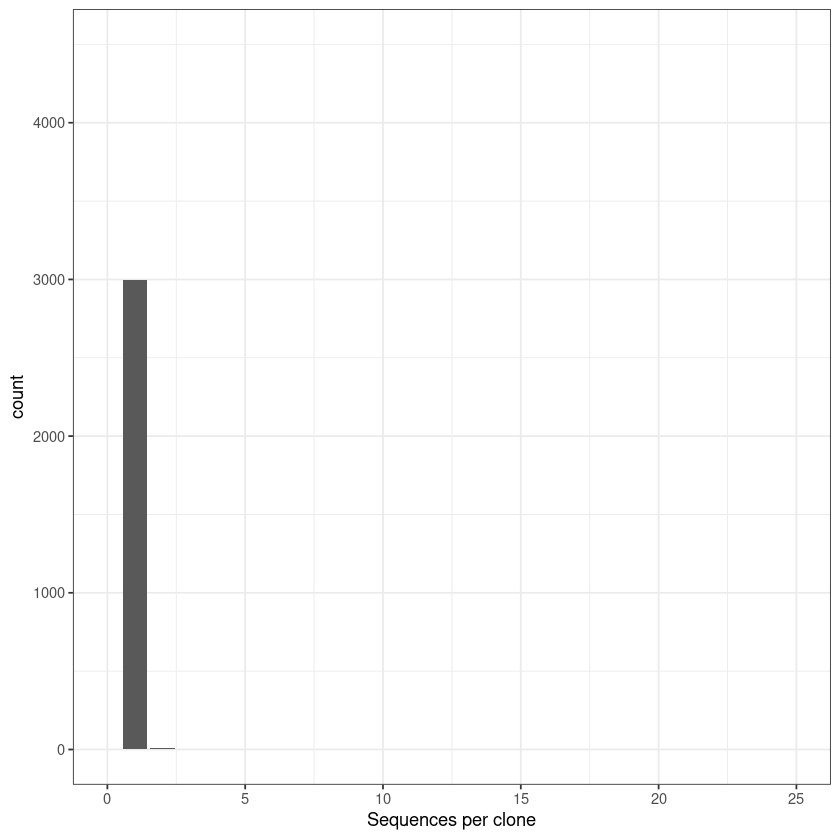

In [7]:
clone_sizes <- countClones(results_db)

# Plot cells per clone
ggplot(clone_sizes, aes(x=seq_count)) + geom_bar() + theme_bw() + xlab("Sequences per clone") + xlim(0, 25) +ylim(0, 4500)